# Random Walk for n-step TD

## Here's how you can run a random walk:

(6, 1, True)


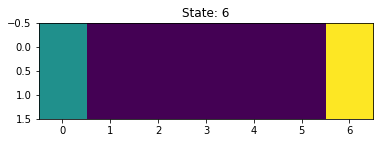

In [1]:
from time import sleep
import numpy as np
from IPython.display import clear_output
from randomwalk import RandomWalk

%matplotlib inline
env = RandomWalk(non_terminal_states=5, init_state=3)

for i in range(100):
    # a = np.random.choice(['left', 'right'])
    # res = env.step(a)
    res = env.random_step()
    s_, r, done = res
    print(res)
    env.render()
    sleep(0.1)
    if done:
        break
    clear_output(wait=True)

In [2]:
print(env.observation_space)
print(env.observation_space["n"])
print()
print(env.action_space)

{'n': 7, 'Terminal states': 2, 'Non-terminal states': 5}
7

['left', 'right']


## n-step TD (Policy is a uniform distribution)
<img src="images/n-stepTD.PNG">

In [5]:
import numpy as np

class N_StepTD:
    def __init__(self, states_number, actions, alpha=0.5, gamma=1, n_step=5):
        self.alpha = alpha
        self.gamma = gamma
        self.states_number = states_number
        self.actions = actions
        self.V = np.zeros(states_number) + 0.5 # Initial Value is 0.5
        self.new_a = None
        
        #
        self.steps_memory = []
        self.n_step = n_step
        self.current_step = 0
    
    def act(self, state):
        act = np.random.choice(self.actions)
        return act
    
    def update(self,new_s,r,done):
        self.steps_memory.append({"s_": new_s, "r": r, "done": done})
        self.current_step += 1
        
        if self.current_step >= self.n_step - 1:
            self.TD_update()
        if done:
            for _ in range(self.n_step):
                self.steps_memory.append({"s_": -1, "r": 0, "done": True})
                self.TD_update()
    
    def TD_update(self):
        self.V[0], self.V[-1] = 0, 0
        G = 0
        discount = 1
        for step in self.steps_memory[(self.current_step - self.n_step + 1) + 1:]:
            G += discount * step['r']
            discount *= self.gamma
        last_step = self.steps_memory[-1]
        G += discount * (1 - float(last_step['done'])) * self.V[last_step['s_']]
        state_to_update = self.steps_memory[self.current_step - self.n_step + 1]
        self.V[state_to_update['s_']] += self.alpha * (G - self.V[state_to_update['s_']])
        
    def print_V(self):
        print("\tV(s)\n==================")
        for i, element in enumerate(self.V):
            print("{0:3} : {1:5.4f}".format(i, element))
    
    def reset(self):
        self.current_step = 0
        self.steps_memory = []

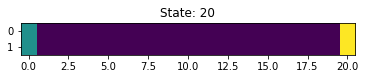

	V(s)
  0 : 0.0000
  1 : 0.1019
  2 : 0.1241
  3 : 0.0000
  4 : 0.0933
  5 : 0.1394
  6 : 0.1159
  7 : 0.2638
  8 : 0.2706
  9 : 0.4278
 10 : 0.4215
 11 : 0.5221
 12 : 0.5233
 13 : 0.5509
 14 : 0.5680
 15 : 0.5726
 16 : 0.5736
 17 : 0.9937
 18 : 0.6170
 19 : 0.5745
 20 : 0.0000


In [6]:
from time import sleep
import numpy as np
from IPython.display import clear_output
from randomwalk import RandomWalk

%matplotlib inline
env = RandomWalk(non_terminal_states=19, init_state=10)
agent = N_StepTD(states_number=env.observation_space["n"], actions=env.action_space, n_step=5)

steps = []
returns = []
for episode in range(10):
    env.reset()
    agent.reset()
    state = env.state
    
    done = False
    step_n = 0
    return_episode = 0
    while not done:
        action = agent.act(state)
        new_state,reward,done = env.step(action)
        return_episode += reward
        agent.update(new_state,reward,done)
        state = new_state
        step_n += 1
        
        env.render()
        agent.print_V()
        #sleep(1)
        clear_output(wait=True)
        """
        if done:
            steps.append(step_n)
            returns.append(return_episode)
            clear_output(wait=True)
            plt.title("Steps:" + str(step_n) + " Return:"+str(return_episode))
            plt.plot(list(range(len(steps))),steps)
            plt.plot(list(range(len(steps))),returns)
            plt.legend(["Steps", "Returns"])
            plt.show()
        """